dataset we are going to use is co2 from stats model datasets

In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
co2=sm.datasets.co2.load_pandas()
y=co2.data

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
y.head(5)

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [5]:
#resample it to month
y=y.resample('MS').mean()

In [8]:
y=y.fillna(y.bfill())

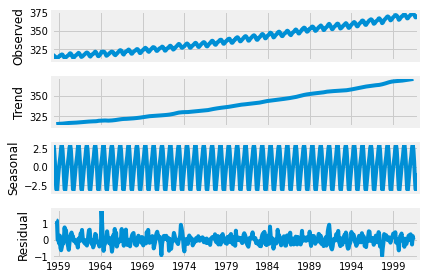

In [14]:
#visualize the time series data with decomposit

decompositon=sm.tsa.seasonal_decompose(y,model='additive')
fig=decompositon.plot()
fig.show()

In [ ]:
#step3 the arima time series model

commonly used timeseries model is arima
it stands for auto regressive integrated moving average.

it can be fitted to tomeseries data to predict or understand future points

there are 3 distinct integer(p,d,q) that are used in arima models so arima models are denoted by ARIMA(p,d,q) together p,d,q, account for seasonality trend and noise

p- auto regressive part of model.it helps us to use past values in our model

d- integrated part of model.this helps to incorpote the amount of differencing
ex-it is likely to be same temperature tomorrow if the difference between temperatures in very small over the past 3 days

q-moving average this allows us to set the model error as a linear combination of erroe values observed at previous time points in the past.


when dealing with seasonal effects we make use of seasonal arima which is denoted by ARIMA(p,d,q)(P,D,Q)S. here (p,d,q) are the non seasonal parameters.and (P,D,Q) Have same definition but are applied to seasonal component of the timeseries .The term s is periodicity of the time series (4 for quater, 12 for yearlY)


In [ ]:
#parameter selection for arima time series model


whe trying to fit timeseries data into seasonal arima our first goal is to find arima(p,d,q)(P,D,Q)S.that optimise the interst. we have to find optimal values for p,d,q and P,D,Q .

We will use grid search to iteratively explore different combination of parameters.for each combination of parametes we fit new seasonal arima model with sarimax() function from stats models module and assess its overall quality.
The code is given below

In [17]:
#define the values of p,d,q any values between 0 and 2
p=d=q=range(0,2)
#generate all combinations of pdq triplets
pdq=list(itertools.product(p,d,q))

In [21]:
#generate all different combinations of seasonal pdq tripelts
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

In [24]:
print('examples')
for i in range(1,7):
  print('sarimax{}{}'.format(pdq[i],seasonal_pdq[i]))
  

examples
sarimax(0, 0, 1)(0, 0, 1, 12)
sarimax(0, 1, 0)(0, 1, 0, 12)
sarimax(0, 1, 1)(0, 1, 1, 12)
sarimax(1, 0, 0)(1, 0, 0, 12)
sarimax(1, 0, 1)(1, 0, 1, 12)
sarimax(1, 1, 0)(1, 1, 0, 12)


In [ ]:
#we can use aic akaike information criterion value which measures how wll a model 
#fits the data by taking the overall complexity
#a model which fits data very well will be assigned larger aic score than a model
#that uses fewer features
#lower aic value is better


In [32]:

for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      model=sm.tsa.statespace.SARIMAX(y,order=param,
                                      seasonal_order=param_seasonal,
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
      results=model.fit()
      print('sarimax {} * {} -aic score{}'.format(param,param_seasonal,results.aic))
    except:
      continue

sarimax (0, 0, 0) * (0, 0, 0, 12) -aic score7612.583429881011
sarimax (0, 0, 0) * (0, 0, 1, 12) -aic score6787.3436240338315
sarimax (0, 0, 0) * (0, 1, 0, 12) -aic score1854.828234141261
sarimax (0, 0, 0) * (0, 1, 1, 12) -aic score1596.7111727640981
sarimax (0, 0, 0) * (1, 0, 0, 12) -aic score1058.9388921320035
sarimax (0, 0, 0) * (1, 0, 1, 12) -aic score1056.2878518713133
sarimax (0, 0, 0) * (1, 1, 0, 12) -aic score1361.6578977746117
sarimax (0, 0, 0) * (1, 1, 1, 12) -aic score1044.7647912957195
sarimax (0, 0, 1) * (0, 0, 0, 12) -aic score6881.048754156435
sarimax (0, 0, 1) * (0, 0, 1, 12) -aic score6072.662327461802
sarimax (0, 0, 1) * (0, 1, 0, 12) -aic score1379.1941066935976
sarimax (0, 0, 1) * (0, 1, 1, 12) -aic score1241.4174716916696
sarimax (0, 0, 1) * (1, 0, 0, 12) -aic score1079.499039374615
sarimax (0, 0, 1) * (1, 0, 1, 12) -aic score930.5388008098283
sarimax (0, 0, 1) * (1, 1, 0, 12) -aic score1119.5957893608688
sarimax (0, 0, 1) * (1, 1, 1, 12) -aic score807.0912989044791

In [33]:
model=sm.tsa.statespace.SARIMAX(y,
                                order=(1,1,1),
                                seasonal_order=(1,1,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results=model.fit()

In [38]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3182      0.092      3.442      0.001       0.137       0.499
ma.L1         -0.6254      0.077     -8.162      0.000      -0.776      -0.475
ar.S.L12       0.0010      0.001      1.732      0.083      -0.000       0.002
ma.S.L12      -0.8769      0.026    -33.811      0.000      -0.928      -0.826
sigma2         0.0972      0.004     22.632      0.000       0.089       0.106


In [ ]:
#when fitting arima model or any other model it is important to run
#diagonistics to ensure that none of hte assumptions made are violated
#plot_diagnostics 

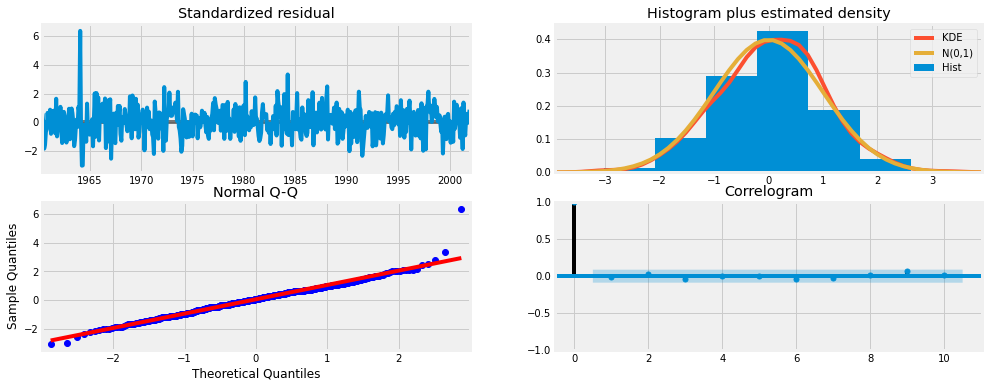

In [41]:
results.plot_diagnostics(figsize=(15,6))
plt.show()

In [57]:
#step-6 validationg results
pred=results.get_prediction(start=pd.to_datetime('1998-01-01'),dynamic=False)
pred_ci=pred.conf_int()

In [ ]:
pred_ci

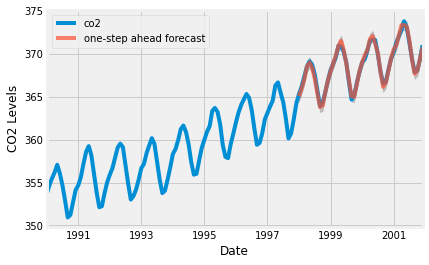

In [59]:
ax=y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='one-step ahead forecast',alpha=.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()
plt.show()

In [73]:
''' it is useful to quantify the accuracy of our forecasts.we will use mse
mean squared erroe which summarises the error of forecasts'''
y_forecasted = pred.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = (y_forecasted - y_truth)


In [82]:
 y_truth=y['1998-01-01':].squeeze()

In [85]:
# Compute the mean square error
mse = ((y_forecasted - y_truth)**2).mean()

In [86]:
mse

0.07300437378161626

In [ ]:
#step7 producing and visualizing forecasts


In [87]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

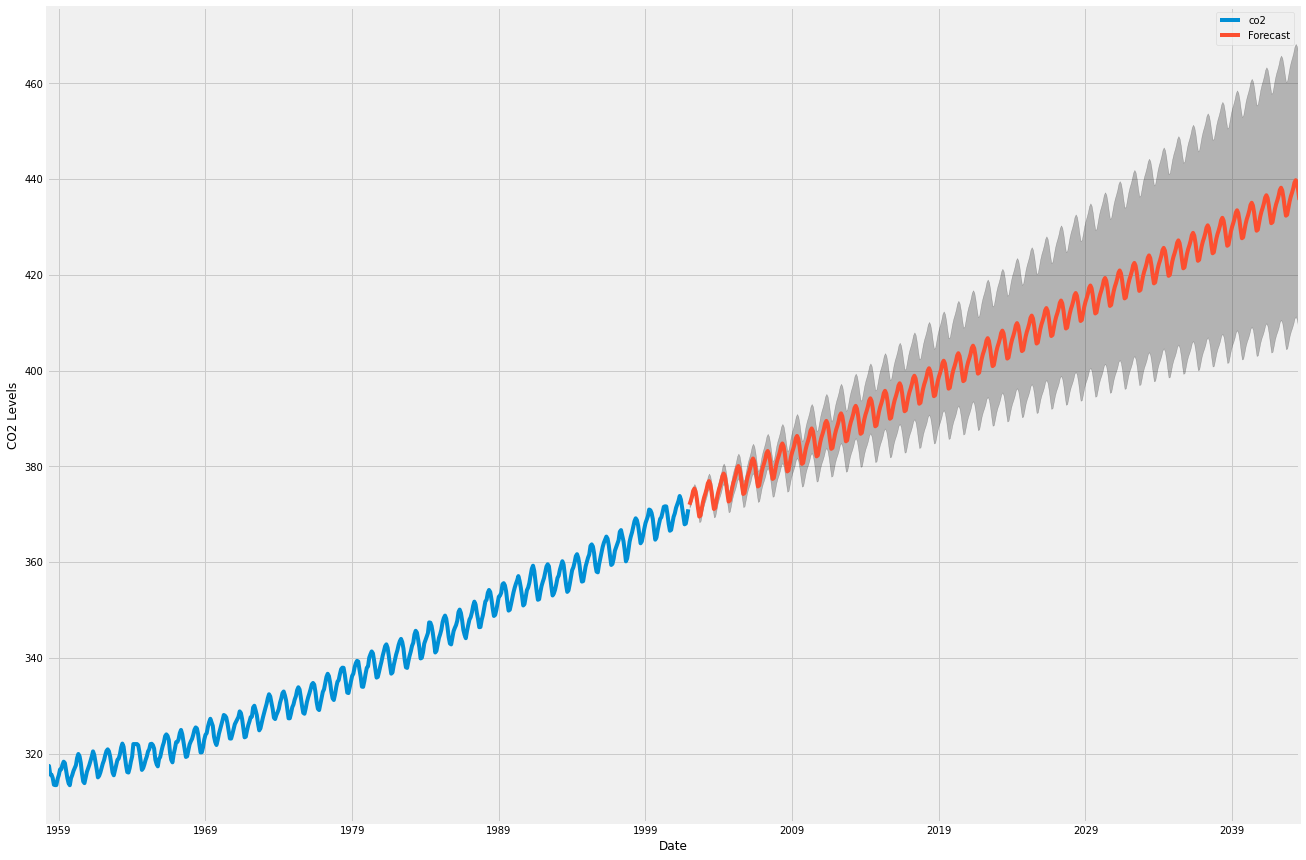

In [88]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()